In [78]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import csv
import torch
import pandas as pd
import scipy.sparse as sp
import plotly

In [79]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [80]:
with open('../../saved_records/record_per_se_degree_v_full_final_0.pkl', 'rb') as f:
    full_model_record = pickle.load(f)
with open('../../saved_records/record_per_se_degree_v_full_final_0_ddionly.pkl', 'rb') as f:
    ddionly_model_record = pickle.load(f)

In [81]:
def process_results(record):
    dic = {}
    num_pos_edges = []
    num_neg_edges = []
    side_effect_type_list = []
    bin_list = []
    auroc_list = []
    auprc_list = []

    for side_effect_type, side_effect_dict in record.items():
        for cluster, deg_dict in side_effect_dict.items():
            if deg_dict['results'] == {}:
                continue
            auroc_list.append(deg_dict['results']['auroc'])
            auprc_list.append(deg_dict['results']['auprc'])
            side_effect_type_list.append(side_effect_type)
            bin_list.append(cluster)
            num_pos_edges.append(int(deg_dict['num_pos_edges']))
            num_neg_edges.append(int(deg_dict['num_neg_edges']))
    return dic, num_pos_edges, num_neg_edges, side_effect_type_list, bin_list, auroc_list, auprc_list

dic, num_pos_edges, num_neg_edges, side_effect_type_list, bin_list, auroc_list, auprc_list = process_results(full_model_record)
dic2, num_pos_edges2, num_neg_edges2, side_effect_type_list2, bin_list2, auroc_list2, auprc_list2 = process_results(ddionly_model_record)

In [82]:
pd.set_option('display.max_rows', 20)

data = {'side_effect_type': side_effect_type_list,
        'bin': bin_list,
        'num_pos_edges': num_pos_edges,
        'num_neg_edges': num_neg_edges,
        'auroc': auroc_list,
        'auprc': auprc_list
       }
df = pd.DataFrame.from_dict(data)

data2 = {'side_effect_type': side_effect_type_list2,
        'bin': bin_list2,
        'num_pos_edges': num_pos_edges2,
        'num_neg_edges': num_neg_edges2,
        'auroc': auroc_list2,
        'auprc': auprc_list2
       }
df2 = pd.DataFrame.from_dict(data2)

df

,side_effect_type,bin,num_pos_edges,num_neg_edges,auroc,auprc
0,"(drug, side_effect_0, drug)",0,80,889,0.957227,0.639805
1,"(drug, side_effect_0, drug)",2,1929,729,0.864315,0.927842
2,"(drug, side_effect_0, drug)",1,465,856,0.916471,0.820055
3,"(drug, side_effect_1, drug)",0,150,1537,0.955949,0.682291
4,"(drug, side_effect_1, drug)",2,3101,1251,0.857507,0.919778
...,...,...,...,...,...,...
3286,"(drug, side_effect_1095, drug)",2,81,30,0.944033,0.980641
3287,"(drug, side_effect_1095, drug)",1,20,45,0.933333,0.856431
3288,"(drug, side_effect_1096, drug)",0,1,36,1.000000,1.000000
3289,"(drug, side_effect_1096, drug)",2,111,41,0.927928,0.968103


In [83]:
df2

,side_effect_type,bin,num_pos_edges,num_neg_edges,auroc,auprc
0,"(drug, side_effect_0, drug)",0,80,889,0.952826,0.542874
1,"(drug, side_effect_0, drug)",2,1929,729,0.854319,0.924323
2,"(drug, side_effect_0, drug)",1,465,856,0.912052,0.776672
3,"(drug, side_effect_1, drug)",0,150,1537,0.954669,0.640547
4,"(drug, side_effect_1, drug)",2,3101,1251,0.853041,0.916892
...,...,...,...,...,...,...
3286,"(drug, side_effect_1095, drug)",2,81,30,0.897942,0.959006
3287,"(drug, side_effect_1095, drug)",1,20,45,0.856667,0.702986
3288,"(drug, side_effect_1096, drug)",0,1,36,1.000000,1.000000
3289,"(drug, side_effect_1096, drug)",2,111,41,0.888156,0.949358


In [84]:
c = df['num_pos_edges'] + df['num_neg_edges']
print(c.sum())
c = df2['num_pos_edges'] + df2['num_neg_edges']
c.sum()

1850280


1850280

In [85]:
df2 = df2.rename(columns= {'auroc' : 'AUROC_DDIOnly', 'auprc' : 'AUPRC_DDIOnly'})
df = df.rename(columns= {'auroc' : 'AUROC', 'auprc' : 'AUPRC'})
total_df = pd.merge(df, df2)
total_df = total_df.groupby(['bin']).agg(AUROC = ('AUROC', 'mean'), AUPRC = ('AUPRC', 'mean'),
                                         AUROC_DDIOnly = ('AUROC_DDIOnly', 'mean'), AUPRC_DDIOnly = ('AUPRC_DDIOnly', 'mean')).reset_index()
total_df['node_degree'] = ['<b>Bin 1</b><br>(d<16,000)','<b>Bin 2</b><br>(16,000<d<26,000)','<b>Bin 3</b><br>(26,000<d<81,000)']
total_df

,bin,AUROC,AUPRC,AUROC_DDIOnly,AUPRC_DDIOnly,node_degree
0,0,0.966187,0.745826,0.956974,0.633185,"<b>Bin 1</b><br>(d<16,000)"
1,1,0.946304,0.877393,0.928532,0.828363,"<b>Bin 2</b><br>(16,000<d<26,000)"
2,2,0.902928,0.946173,0.884246,0.936245,"<b>Bin 3</b><br>(26,000<d<81,000)"


## Plot

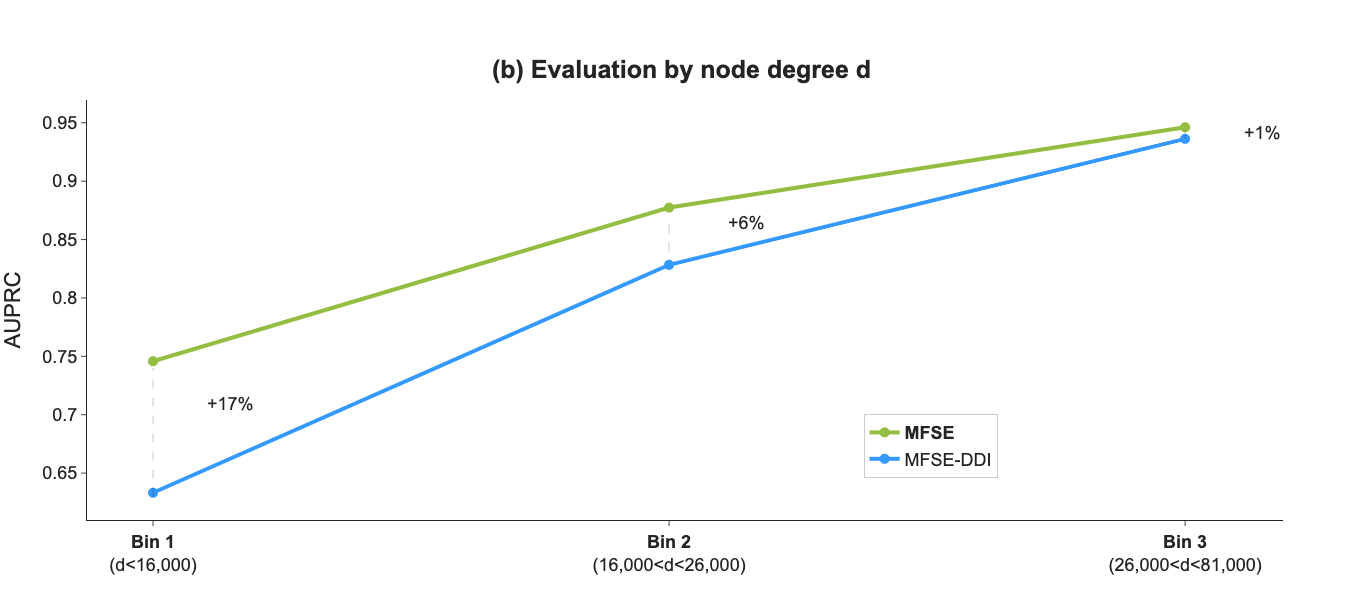

In [86]:
import plotly.graph_objects as go

data = [go.Scatter(x=total_df['node_degree'], y=total_df['AUPRC'], name='<b>MFSE</b>', line=dict(color='#93be41', width=4), marker=dict(size=10)),
        go.Scatter(x=total_df['node_degree'], y=total_df['AUPRC_DDIOnly'], name='MFSE-DDI', line=dict(color='#3399ff',width=4), marker=dict(size=10)),
       ]
fig = go.Figure(data=data)
fig.update_layout(template='simple_white', title='<b>(b) Evaluation by node degree d</b>', yaxis_title='AUPRC', title_x=0.5, title_y=0.9,
                  width=600, height=600, legend=dict(x=.65,y=.1,bordercolor="Black",borderwidth=.2), font=dict(family="Arial", size=18))
fig.update_xaxes(type='category')
fig.add_shape(type="line", x0=0, y0=0.63, x1=0, y1=0.74, line_width=0.7, line_dash="dash", line_color="black")
fig.add_shape(type="line", x0=1, y0=0.84, x1=1, y1=0.87, line_width=0.7, line_dash="dash", line_color="black")
fig.add_shape(type="line", x0=2, y0=0.936, x1=2, y1=0.944, line_width=0.7, line_dash="dash", line_color="black")
fig.add_annotation(x=0.15, y=0.71, text="+17%", showarrow=False, font=dict(size=18))
fig.add_annotation(x=1.15, y=0.865, text="+6%", showarrow=False, font=dict(size=18))
fig.add_annotation(x=2.15, y=0.942, text="+1%", showarrow=False, font=dict(size=18))

fig.show()

## Bins

In [87]:
# bin1 = df[((df['num_pos_edges'] - df['num_neg_edges']).between(-50,50)) &
#           (df['bin'] == 1) &
#           (df['num_pos_edges'] > 100) &
#           (df['num_neg_edges'] > 100)
#          ]
# bin1 = df[(df['bin'] == 1) &
#           (df['num_pos_edges'] < df['num_neg_edges'])
#         ]
bin1 = df[(df['bin'] == 1)]
bin1

,side_effect_type,bin,num_pos_edges,num_neg_edges,AUROC,AUPRC
2,"(drug, side_effect_0, drug)",1,465,856,0.916471,0.820055
5,"(drug, side_effect_1, drug)",1,1031,1494,0.900052,0.827273
8,"(drug, side_effect_2, drug)",1,118,205,0.933485,0.884078
11,"(drug, side_effect_3, drug)",1,53,101,0.900430,0.855613
14,"(drug, side_effect_4, drug)",1,210,454,0.948164,0.890920
...,...,...,...,...,...,...
3278,"(drug, side_effect_1092, drug)",1,76,204,0.927954,0.783141
3281,"(drug, side_effect_1093, drug)",1,31,79,0.977542,0.952416
3284,"(drug, side_effect_1094, drug)",1,198,408,0.918734,0.805966
3287,"(drug, side_effect_1095, drug)",1,20,45,0.933333,0.856431


In [88]:
print(bin1['AUROC'].mean())
bin1['AUPRC'].mean()

0.946303513740105


0.8773932141424368

In [89]:
# bin2 = df[((df['num_pos_edges'] - df['num_neg_edges']).between(-150,150)) &
#           (df['bin'] == 2) &
#           (df['num_pos_edges'] > 100) &
#           (df['num_neg_edges'] > 100)
#         ]
# bin2 = df[(df['bin'] == 2) &
#           (df['num_pos_edges'] > df['num_neg_edges'])
#         ]
bin2 = df[(df['bin'] == 2)]
bin2

,side_effect_type,bin,num_pos_edges,num_neg_edges,AUROC,AUPRC
1,"(drug, side_effect_0, drug)",2,1929,729,0.864315,0.927842
4,"(drug, side_effect_1, drug)",2,3101,1251,0.857507,0.919778
7,"(drug, side_effect_2, drug)",2,435,167,0.905981,0.954101
10,"(drug, side_effect_3, drug)",2,224,98,0.908801,0.952289
13,"(drug, side_effect_4, drug)",2,1119,414,0.918356,0.955845
...,...,...,...,...,...,...
3277,"(drug, side_effect_1092, drug)",2,458,168,0.869399,0.930931
3280,"(drug, side_effect_1093, drug)",2,196,76,0.913534,0.959405
3283,"(drug, side_effect_1094, drug)",2,989,373,0.859405,0.922249
3286,"(drug, side_effect_1095, drug)",2,81,30,0.944033,0.980641


In [90]:
print(bin2['AUROC'].mean())
bin2['AUPRC'].mean()

0.9029276310053816


0.9461732804650232

In [91]:
# bin0 = df[((df['num_pos_edges'] - df['num_neg_edges']).between(-50,50)) &
#           (df['bin'] == 0) &
#           (df['num_pos_edges'] > 0)
#         ]
bin0 = df[(df['bin'] == 0) &
          (df['num_pos_edges'] < df['num_neg_edges'])
        ]
#bin0 = df[(df['bin'] == 0)]
bin0

,side_effect_type,bin,num_pos_edges,num_neg_edges,AUROC,AUPRC
0,"(drug, side_effect_0, drug)",0,80,889,0.957227,0.639805
3,"(drug, side_effect_1, drug)",0,150,1537,0.955949,0.682291
6,"(drug, side_effect_2, drug)",0,21,200,0.947143,0.733842
9,"(drug, side_effect_3, drug)",0,21,97,0.864507,0.775727
12,"(drug, side_effect_4, drug)",0,29,488,0.952586,0.577759
...,...,...,...,...,...,...
3276,"(drug, side_effect_1092, drug)",0,20,180,0.991944,0.919294
3279,"(drug, side_effect_1093, drug)",0,3,75,0.862222,0.691474
3282,"(drug, side_effect_1094, drug)",0,35,437,0.966721,0.779724
3285,"(drug, side_effect_1095, drug)",0,3,29,1.000000,1.000000


In [92]:
print(bin0['AUROC'].mean())
bin0['AUPRC'].mean()

0.9661874632516512


0.7458262194043052